Convergence achieved after 3 iterations


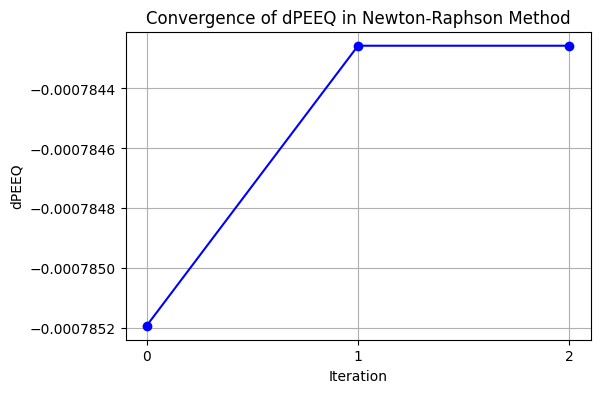

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
E = 200e9  # Young's modulus in Pascals (example value)
sigma_H0 = 500e6  # Initial yield strength (example value)
n_hardening = 0.2  # Hardening exponent (example value)
nu = 0.3  # Poisson's ratio (example value)
mu = E/(2.0 * (1.0 + nu))
lamb = E*nu/((1.0 + nu) * (1.0 - 2.0 * nu))

PEEQ_0 = sigma_H0 / E
PEEQ = 0.01  # Initial plastic strain (example value)
von_Mises_stress = 500e6  # Von Mises stress (example value)
toler = 1e-6  # Tolerance for convergence
newton = 50  # Maximum iterations

# Initial values
sigma_Y = sigma_H0 * (1 + PEEQ / PEEQ_0)**n_hardening
dPEEQ = 0
dPEEQ_history = []

# Newton-Raphson iterative solution
for k_newton in range(1, newton + 1):
    E_tangent = E * n_hardening * (1 + (PEEQ + dPEEQ) / PEEQ_0)**(n_hardening - 1)
    rhs = von_Mises_stress - (3 * mu) * dPEEQ - sigma_Y
    dPEEQ += rhs / ((3 * mu) + E_tangent)
    sigma_Y = sigma_H0 * (1 + (PEEQ + dPEEQ) / PEEQ_0)**n_hardening
    
    dPEEQ_history.append(dPEEQ)
    
    if abs(rhs) < toler * sigma_H0:
        print(f'Convergence achieved after {k_newton} iterations')
        break
else:
    print('WARNING: Plasticity loop failed to converge')

# Plotting the convergence of dPEEQ
plt.figure(figsize=(6, 4))
plt.plot(dPEEQ_history, marker='o', linestyle='-', color='b')
plt.title('Convergence of dPEEQ in Newton-Raphson Method')
plt.xlabel('Iteration')
plt.xticks(range(0, len(dPEEQ_history)))
plt.ylabel('dPEEQ')
plt.grid(True)
plt.show()


In [5]:
import sympy as sp

# Define the variable
epsilon_p = sp.symbols('epsilon_p')

# Define the equation for NT
NT = 10**(23.26 - 2.33 * sp.exp(-5.5 * epsilon_p))

# Compute the derivative of NT with respect to epsilon_p
dNT_dEpsilon_p = sp.diff(NT, epsilon_p)

# Simplify the expression
dNT_dEpsilon_p_simplified = sp.simplify(dNT_dEpsilon_p)

# Display the derivative
print("The derivative of NT with respect to epsilon_p is:")
dNT_dEpsilon_p_simplified


The derivative of NT with respect to epsilon_p is:


5.36950559465822e+24*exp(-5.5*epsilon_p)/10**(2.33*exp(-5.5*epsilon_p))

: 